## Librerias

In [2]:
import numpy as np
import sympy as sym
from sympy import symbols
sym.init_printing()

## Problema



Considere dos bloques de masa $m_1$ y $m_2$, el bloque $m_1$ empieza con una velocidad $v_1 = - 1 \text{ m/s}$ el bloque $m_2$ empieza en reposo. Primero el bloque 1 choca con el bloque 2 de forma elastica, luego el bloque 2 choca elasticamente contra la pared, y luego se dirige el bloque 2 de nuevo hacia el bloque 1 para chocar de nuevo elasticamente. El bloque 2 choca elasticamente varias veces contra la pared y contra el bloque 1 y se cuentan el número de choques elasticos totales, hasta que los bloques dejan de chocar.

![](https://raw.githubusercontent.com/diegour1/CompMetodosComputacionales/main/DataFiles/image9.png)

Más detalles del problema se pueden encontrar en este [link](https://www.youtube.com/watch?v=HEfHFsfGXjs&ab_channel=3Blue1Brown).



a) Si los bloques 1 y 2 tienen en cierto momento una velocidad $v_{1i}$ y $v_{2i}$ la velocidades después del choque elastico están dadas por, 

$$
v_{1f} = v_{1i}\Big(\frac{m_1-m_2}{m_1+m_2}\Big) + v_{2i}\Big(\frac{2m_2}{m_1+m_2}\Big)
$$

$$
v_{2f} = v_{1i}\Big(\frac{2m_1}{m_1+m_2}\Big) + v_{2i}\Big(\frac{m_2-m_1}{m_1+m_2}\Big)
$$

Demuestre la validez de esas dos ecuaciones con ayuda de la libreria sympy. (Imprima la ecuación simplificada que resulta de simpy)

Se tiene que para la conservación de momento lineal:
$$m_1v_{1i} + m_2v_{2i} = m_2v_{2f} + m_1v_{1f}$$ 
y de la energía:
$$\frac{1}{2}m_1v_{1f}^2 + \frac{1}{2}m_2v_{2f}^2 =\frac{1}{2}m_1v_{1i}^2 + \frac{1}{2}m_2v_{2i}^2 $$

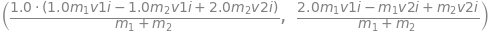

In [3]:
# su codigo aqui
v1i,v1f,v2i,v2f,m1,m2 = sym.Symbol('v1i'),sym.Symbol('v1f'),sym.Symbol('v2i'),sym.Symbol('v2f'),sym.Symbol('m1'),sym.Symbol('m2')

exp = sym.solve([m1*v1i + m2*v2i - m2*v2f - m1*v1f,0.5*m1*v1f**2 + 0.5*m2*v2f**2 - 0.5*m1*v1i**2 - 0.5*m2*v2i**2],[v1f,v2f])
sym.simplify(exp[1][0]), sym.simplify(exp[1][1])


b) Cree la función `num_collisions(m1, m2)` que reciba las masas $m_1$ y $m_2$ de los bloques 1 y 2 respectivamente, y retorne el número de choques totales `count`, la velocidad inicial del bloque 1 es $v_1 = -1 \text{ m/s}$ y el bloque 2 empieza en reposo.

In [19]:
def num_collisions(m1,m2):
    count = 0
    v = np.array([-1,0])
    B = (1/(m1+m2))*np.array([[m1-m2,2*m2],[2*m1,m2-m1]])
    while True:
        if count%2 == 0:
            v = B@v
            count += 1
            if v[1] >= 0 and v[0] >= 0:
                if v[1] < v[0]:
                    break
        elif count%2 != 0:
            v[1] = -v[1]
            count += 1
            if v[1] >= 0 and v[0] >= 0:
                if v[1] < v[0]:
                    break
    return count
        

In [33]:
# codigo para la verificacion no modificar
for i in range(13):
    print(num_collisions(10**i,1))

3
10
31
99
314
993
3141
9934
31415
99345
314159
993458
3141592


c)¿ Cómo resolvería el problema analíticamente ? (Sin ver las soluciones en internet) (No hay soluciones correctas)

Dado que hay una relación entre el número de colisiones y el valor de $\pi$. Se debe asociar este problema de alguna manera con un símil donde se encuentre un círculo. Usaría esta asociación para hacer una compararación con un péndulo amortiguado que choca contra una pared perdiendo energía y así, reduciendo su período hasta que el número de choques dé los mismos resultados del problema.